In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio
import seaborn as sns
from fastai.vision import *

In [ ]:
import zipfile
from pathlib import Path
data_path = Path("/content/drive/MyDrive/CARAS/archive.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [ ]:
path = ('./data')

In [ ]:
ls data/train

angry/  disgust/  fear/  happy/  neutral/  sad/  surprise/


In [ ]:
# Load data
batch_size = 256
size = 48
data = ImageDataBunch.from_folder(path=path, train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [ ]:
data

ImageDataBunch;

Train: LabelList (22968 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
happy,happy,happy,happy,happy
Path: data;

Valid: LabelList (5741 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
neutral,happy,surprise,happy,neutral
Path: data;

Test: LabelList (7178 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: EmptyLabelList
,,,,
Path: data

In [ ]:
data.classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

### prueba 1


In [ ]:
learn = cnn_learner(data, models.densenet201, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


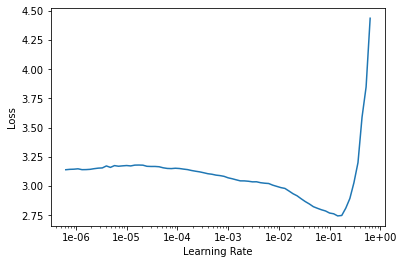

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 1e-02

In [ ]:
learn.fit_one_cycle(19, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.468974,1.936624,0.335482,00:48
1,1.988539,1.674327,0.356906,00:48
2,1.763578,1.615072,0.390176,00:47
3,1.707965,1.519914,0.425710,00:48
4,1.664792,1.435571,0.459153,00:47
5,1.607781,1.411314,0.479533,00:47
6,1.535875,1.321792,0.499390,00:47
7,1.443728,1.343979,0.511932,00:47
8,1.394863,1.242817,0.531789,00:47
9,1.329616,1.220766,0.542414,00:47


In [ ]:
learn.save("score_55+")

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


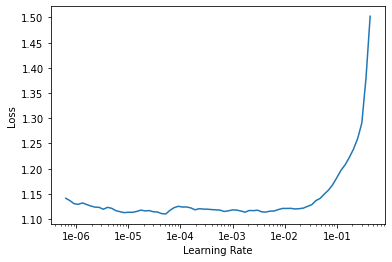

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr_2 = 1e-03

### Prueba 2

In [ ]:
learn2 = cnn_learner(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


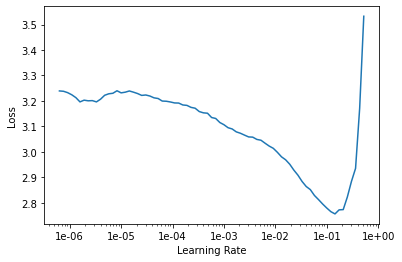

In [ ]:
learn2.lr_find()
learn2.recorder.plot()

In [ ]:
lr2 = 0.05

In [ ]:
learn2.fit_one_cycle(1, max_lr=slice(lr2))

epoch,train_loss,valid_loss,accuracy,time
0,2.044993,1.855206,0.354990,00:27
1,1.916044,3.230865,0.383557,00:27
2,1.636576,1.385952,0.484062,00:27
3,1.455296,1.368102,0.500784,00:27
4,1.340249,1.255904,0.534924,00:27
5,1.255077,1.214092,0.540498,00:27
6,1.197735,1.187108,0.553388,00:27
7,1.163750,1.154857,0.557917,00:27


In [ ]:
learn2.save("/content/drive/MyDrive/CARAS/model_score_55+")

In [ ]:
learn2.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


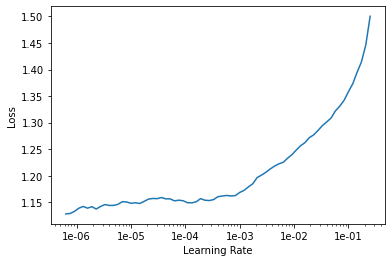

In [ ]:
learn2.lr_find()
learn2.recorder.plot()

In [ ]:
lr2_2 = 1e-05

In [ ]:
learn2.fit_one_cycle(5, max_lr=slice(lr2_2/100,lr2_2))

epoch,train_loss,valid_loss,accuracy,time
0,1.140181,1.147283,0.562968,00:28
1,1.136412,1.138949,0.564884,00:28
2,1.137655,1.136727,0.566974,00:28
3,1.130904,1.141842,0.565755,00:28
